In [105]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
PARENT_PATH='./Assets/Datasets/*/'

TRAINING_PATH=PARENT_PATH + 'Train/*/*'
VALIDATION_PATH=PARENT_PATH + 'Valid/*/*'
TEST_PATH=PARENT_PATH + 'Test/*/*'

In [122]:
images_path_tf_data = tf.data.Dataset.list_files(TEST_PATH, shuffle=True)

In [123]:
images_path_tf_data

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [124]:
images_path_tf_data.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=243>

In [130]:
for img_path in images_path_tf_data.take(1):
    print(f'img path: {img_path}')
    print('='.center(60, '='))

    split_img_path = tf.strings.split(img_path, os.path.sep)
    print(f'split img path: {split_img_path}')

    print('='.center(60, '='))
    result = {value: f'idx-> {index}' for index, value in enumerate(split_img_path.numpy())}
    print(f'split img path and index: {result}')
    
    print('='.center(60, '='))
    index = tf.where(tf.equal(split_img_path, 'Test'))[0][0]
    print(f'Index folder: {index}') 

    print('='.center(60, '='))
    index_label = index + 1
    print(f'Index Label: {index_label}') 
    
    print('='.center(60, '='))
    print(f'Label: {split_img_path[index_label]}')

img path: b'.\\Assets\\Datasets\\SIBI dataset\\Test\\Z\\image_Z_(1685776148.2868435).jpg'
split img path: [b'.' b'Assets' b'Datasets' b'SIBI dataset' b'Test' b'Z'
 b'image_Z_(1685776148.2868435).jpg']
split img path and index: {b'.': 'idx-> 0', b'Assets': 'idx-> 1', b'Datasets': 'idx-> 2', b'SIBI dataset': 'idx-> 3', b'Test': 'idx-> 4', b'Z': 'idx-> 5', b'image_Z_(1685776148.2868435).jpg': 'idx-> 6'}
Index folder: 4
Index Label: 5
Label: b'Z'


In [131]:
def convert_path_to_img_tf_data(image_path, label_idx_from_path, target_size, is_gray=True):
    split_img_path = tf.strings.split(image_path, os.path.sep)
    label = split_img_path[label_idx_from_path]

    channels = 1 if is_gray else 3 

    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=channels) 
    image.set_shape([None, None, channels])
    image = tf.image.resize(image, size=(target_size[0], target_size[1]))
    image = tf.cast(image, tf.uint8)

    return image, label

In [132]:
new_height=224
new_width=224
label_idx_from_path=5

images_tf_data = images_path_tf_data.map(
    map_func=lambda image_path: 
        convert_path_to_img_tf_data(
            image_path=image_path, 
            label_idx_from_path=label_idx_from_path, 
            target_size=(new_height, new_width),
            is_gray=False
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

In [133]:
print(f'info train data: {images_tf_data}')
print(f'number of train data: {len(images_tf_data)}')

info train data: <_ParallelMapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
number of train data: 243


=======================Check Train Data======================
    shape-image: (224, 224, 3)
    dtype-image: <dtype: 'uint8'>
    max-intensity: 255
    min-intensity: 0

    label: b'U'
    label-shape: ()
    image-type: <dtype: 'string'>


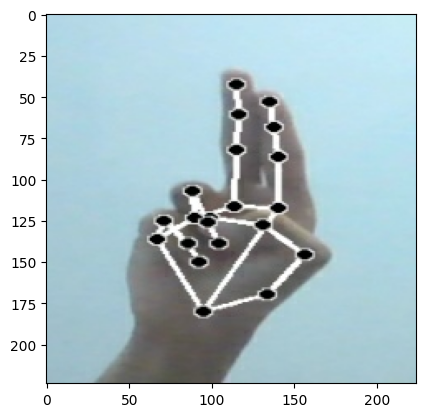

In [135]:
for image, label in images_tf_data.skip(200).take(1):
    print(f"{'Check Train Data'.center(61, '=')}")
    print(f'''    shape-image: {image.shape}
    dtype-image: {image.dtype}
    max-intensity: {tf.reduce_max(image)}
    min-intensity: {tf.reduce_min(image)}

    label: {label}
    label-shape: {label.shape}
    image-type: {label.dtype}'''
    )

    plt.imshow(image, cmap='gray')
plt.show()